In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
def get_diff(df,minus_col, to_minus_col, remain_col):
    new_data_frame = pd.DataFrame()
    if not isinstance(minus_col, list) :
        to_m_col = [to_m_col]
    if not isinstance(to_minus_col, list) :
        to_minus_col = [to_minus_col]

    for mcol in minus_col:
        for to_m_col in to_minus_col:
            new_data_frame[f'{mcol}-{to_m_col}'] = df[mcol] - df[to_m_col]

    new_data_frame[remain_col] = df[remain_col]
    return new_data_frame

In [52]:
dir = '../../data'
cv_lmm = os.path.join(dir, 'CV_errors_lmm.csv')
cv_lmm = pd.read_csv(cv_lmm)
cv_ols = os.path.join(dir, 'CV_errors_ols.csv')
cv_ols = pd.read_csv(cv_ols)
cv_gls = os.path.join(dir, 'CV_errors_wls.csv')
cv_gls = pd.read_csv(cv_gls)
cv_ridge = os.path.join(dir, 'CV_errors_ridge.csv')
cv_ridge = pd.read_csv(cv_ridge)


In [53]:
cv_lmm_new = cv_lmm[['Error_cv_lmm',	'Error_te_lmm', 'Error_cv_lmm_c']]
cv_ols_new = cv_ols[['Error_cv_ols',	'Error_te_ols', 'Error_cv_ols_c']]
cv_gls_new = cv_gls[['Error_cv_wls',	'Error_te_wls', 'Error_cv_wls_c']]
cv_ridge_new = cv_ridge[['Error_cv_ridge', 'Error_cv_ridge_c',	'Error_te_ridge']]
cv_lmm_new['method'] = 'lmm'
cv_ols_new['method'] = 'ols'
cv_gls_new['method'] = 'gls'
cv_ridge_new['method'] = 'ridge'

C:\Users\Archibald\AppData\Local\Temp\ipykernel_70908\2077604711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_lmm_new['method'] = 'lmm'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_70908\2077604711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_ols_new['method'] = 'ols'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_70908\2077604711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [54]:
df = pd.concat([cv_lmm_new, cv_ols_new, cv_gls_new, cv_ridge_new])
df_melted = df.melt(id_vars= 'method')

In [55]:
cv_lmm_diff = get_diff(cv_lmm_new, ['Error_cv_lmm_c','Error_te_lmm'], 'Error_cv_lmm', 'method')
cv_gls_diff = get_diff(cv_gls_new, ['Error_cv_wls_c','Error_te_wls'], 'Error_cv_wls', 'method')
cv_ols_diff = get_diff(cv_ols_new, ['Error_cv_ols_c','Error_te_ols'], 'Error_cv_ols', 'method')
cv_ridge_diff = get_diff(cv_ridge_new, ['Error_cv_ridge_c','Error_te_ridge'], 'Error_cv_ridge', 'method')

diff = pd.concat([cv_lmm_diff, cv_gls_diff, cv_ols_diff, cv_ridge_diff])
diff_melted = diff.melt(id_vars='method')

In [58]:
print(np.mean(cv_lmm_new['Error_cv_lmm_c'] - cv_lmm_new['Error_cv_lmm']))
print(np.mean(cv_lmm_new['Error_te_lmm'] -cv_lmm_new['Error_cv_lmm'] ))

0.030980873696609124
0.017196853151984617


In [45]:
import scipy.stats as stats
s, p1= stats.f_oneway(cv_lmm_new['Error_cv_lmm'], cv_lmm_new['Error_te_lmm'])
s, p2= stats.f_oneway(cv_lmm_new['Error_cv_lmm'], cv_lmm_new['Error_cv_lmm_c'])
s, p3= stats.f_oneway(cv_lmm_new['Error_te_lmm'], cv_lmm_new['Error_cv_lmm_c'])
print(p1)
print(p2)
print(p3)

1.8544439248486866e-06
6.482602315357904e-30
0.00015511412750598852


In [49]:
print(np.mean(cv_gls_new['Error_cv_wls_c'] - cv_gls_new['Error_cv_wls']))
print(np.mean(cv_gls_new['Error_te_wls'] -cv_gls_new['Error_cv_wls'] ))

0.028785218179284824
0.03901616197522411


In [48]:
import scipy.stats as stats
s, p1= stats.f_oneway(cv_gls_new['Error_cv_wls'], cv_gls_new['Error_te_wls'])
s, p2= stats.f_oneway(cv_gls_new['Error_cv_wls'], cv_gls_new['Error_cv_wls_c'])
s, p3= stats.f_oneway(cv_gls_new['Error_te_wls'], cv_gls_new['Error_cv_wls_c'])
print(p1)
print(p2)
print(p3)


0.17522109434626695
0.2982946927957717
0.7224477450055797


Text(0.5, 1.0, 'Boxplot for the Difference of Test Error and CV')

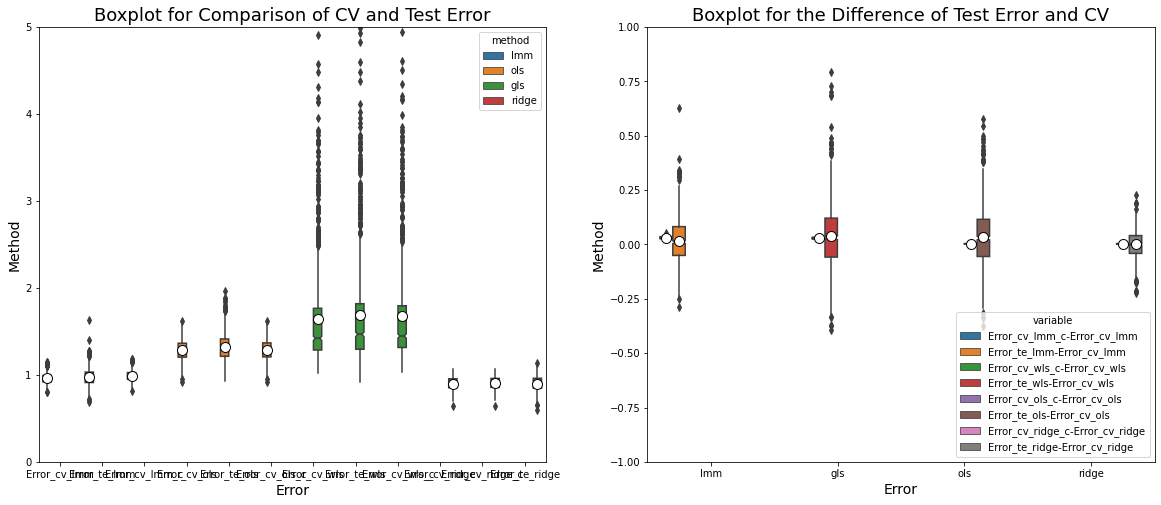

In [38]:

# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(20, 8))

gfg = sns.boxplot(x='variable', y='value', hue='method',data=df_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
gfg.set_ylim(0, 5)
ax[0].set_ylabel('Method', size=14)
ax[0].set_xlabel('Error', size=14)
ax[0].set_title('Boxplot for Comparison of CV and Test Error', size=18)

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=diff_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-1, 1)
ax[1].set_ylabel('Method', size=14)
ax[1].set_xlabel('Error', size=14)
ax[1].set_title('Boxplot for the Difference of Test Error and CV', size=18)

In [128]:
dir = '../../simulation_output/frequentist_CVc/using_fastlmm/10_fixed_snps'
lmm_cv_file = 'CV_errors_lmm.csv'
temp= os.path.join(dir, lmm_cv_file)
lmm_cv = pd.read_csv(temp)
lmm_cv.head()

,Error_cv_lmm,Error_cv_lmm_c,Error_cv_lmm_c_r,Error_cv_lmm_c_s,Error_te_lmm
0,0.645153,0.675604,1.174700,0.601239,0.694969
1,0.617362,0.638520,1.112314,0.578515,0.667656
2,0.654335,0.696450,1.224464,0.630593,0.631622
3,0.643688,0.663144,1.066937,0.622475,0.547315
4,0.644600,0.656558,1.010270,0.625911,0.661486


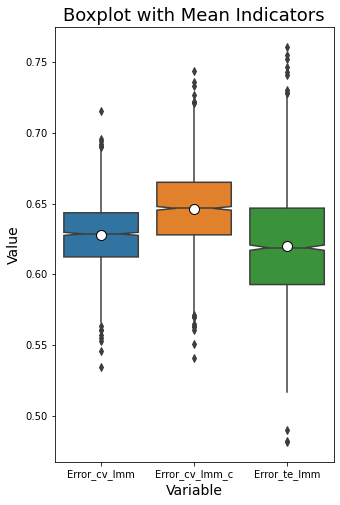

In [129]:
fig, ax = plt.subplots()
temp_column = ['Error_cv_lmm', 'Error_cv_lmm_c', 'Error_te_lmm']
df_lmm = lmm_cv[temp_column]
df_melted = df_lmm.melt()

# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(figsize=(5, 8))

sns.boxplot(x='variable', y='value', data=df_melted, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax)
plt.ylabel('Value', size=14)
plt.xlabel('Variable', size=14)
plt.title('Boxplot with Mean Indicators', size=18)
plt.show()


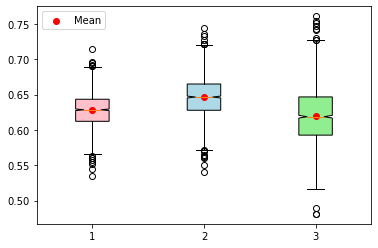

In [34]:
# Create some data
data = [np.random.normal(size=100) for _ in range(4)]

# Create the boxplot
bp = plt.boxplot(lmm_cv_new, patch_artist=True, notch=True, vert=1)

colors = ['pink', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Calculate means and plot them
means = [np.mean(lmm_cv_new.iloc[:,i]) for i in range(lmm_cv_new.shape[1])]
mean_line = plt.scatter(range(1, len(means) + 1), means, color='red', zorder=2)

# Add legend for mean
plt.legend([mean_line], ['Mean'])

plt.show()

In [35]:
dir = '../../simulation_output/frequentist_CVc/100_fixed_snps'
print(os.path.exists(dir))
gls_cv_file = 'CV_errors_wls.csv'
temp= os.path.join(dir, gls_cv_file)
gls_cv = pd.read_csv(temp)
gls_cv.head()

True


,Error_cv_wls,Error_cv_wls_c,Error_cv_wls_c_r,Error_cv_wls_c_s,Error_te_wls
0,0.627276,0.627276,0.627276,0.627276,0.673423
1,0.671499,0.675116,0.712636,0.670762,0.758926
2,0.693916,0.700609,0.761900,0.697914,0.759519
3,0.593358,0.593358,0.593358,0.593358,0.584290
4,0.615162,0.617865,0.639531,0.615480,0.565581


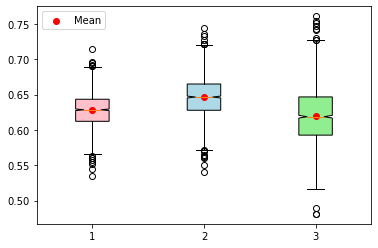

In [38]:
fig, ax = plt.subplots()
temp_column = ['Error_cv_wls', 'Error_cv_wls_c', 'Error_te_wls']
gls_cv_new = gls_cv[temp_column]

# Create the boxplot
bp = plt.boxplot(lmm_cv_new, patch_artist=True, notch=True, vert=1)

colors = ['pink', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Calculate means and plot them
means = [np.mean(lmm_cv_new.iloc[:,i]) for i in range(lmm_cv_new.shape[1])]
mean_line = plt.scatter(range(1, len(means) + 1), means, color='red', zorder=2)

# Add legend for mean
plt.legend([mean_line], ['Mean'])

plt.show()

In [83]:
dir = '../../simulation_output/frequentist_CVc/100_fixed_snps'
print(os.path.exists(dir))
ols_cv_file = 'CV_errors_ols.csv'
temp= os.path.join(dir, ols_cv_file)
ols_cv = pd.read_csv(temp)
ols_cv.head()
temp_column = ['Error_cv_ols', 'Error_cv_ols_c', 'Error_te_ols']
ols_cv_new = ols_cv[temp_column]

True


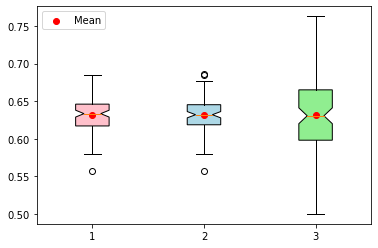

In [85]:
fig, ax = plt.subplots()

# Create the boxplot
bp = plt.boxplot(ols_cv_new, patch_artist=True, notch=True, vert=1)

colors = ['pink', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Calculate means and plot them
means = [np.mean(ols_cv_new.iloc[:,i]) for i in range(ols_cv_new.shape[1])]
mean_line = plt.scatter(range(1, len(means) + 1), means, color='red', zorder=2)

# Add legend for mean
plt.legend([mean_line], ['Mean'])

plt.show()

In [49]:
dir = '../../simulation_output/frequentist_CVc/100_fixed_snps'
print(os.path.exists(dir))
ridge_cv_file = 'CV_errors_ridge.csv'
temp= os.path.join(dir, ridge_cv_file)
ridge_cv = pd.read_csv(temp)
ridge_cv.head()

True


,Error_cv_ridge,Error_cv_ridge_c,Error_cv_ridge_c_r,Error_cv_ridge_c_s,Error_te_ridge
0,0.620598,0.620598,0.620598,0.620598,0.681791
1,0.613078,0.612609,0.676496,0.614089,0.668118
2,0.643549,0.642201,0.761347,0.649464,0.710867
3,0.590918,0.590918,0.590918,0.590918,0.590112
4,0.603273,0.604575,0.641399,0.605022,0.554061


In [51]:
temp_column = ['Error_cv_ridge', 'Error_cv_ridge_c', 'Error_te_ridge']
ridge_cv_new = ridge_cv[temp_column]

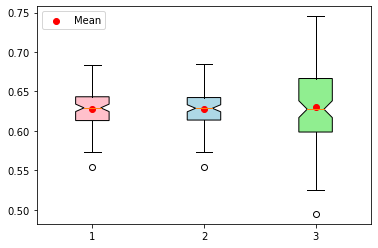

In [52]:
fig, ax = plt.subplots()

# Create the boxplot
bp = plt.boxplot(ridge_cv_new, patch_artist=True, notch=True, vert=1)

colors = ['pink', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Calculate means and plot them
means = [np.mean(ridge_cv_new.iloc[:,i]) for i in range(lmm_cv_new.shape[1])]
mean_line = plt.scatter(range(1, len(means) + 1), means, color='red', zorder=2)

# Add legend for mean
plt.legend([mean_line], ['Mean'])

plt.show()

In [92]:
df_lmm['Group'] = 'lmm'
ridge_cv_new['Group'] = 'ridge'
ols_cv_new['Group'] ='ols'
gls_cv_new['Group'] = 'gls'

C:\Users\Archibald\AppData\Local\Temp\ipykernel_68824\749274746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lmm['Group'] = 'lmm'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_68824\749274746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridge_cv_new['Group'] = 'ridge'
C:\Users\Archibald\AppData\Local\Temp\ipykernel_68824\749274746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [123]:

# Assume we have two dataframes df1 and df2 with similar columns


df = pd.concat([df_lmm, ridge_cv_new, gls_cv_new, ols_cv_new])
melted_df = df.melt(id_vars='Group')
melted_df

,Group,variable,value
0,lmm,Error_cv_lmm,0.645153
1,lmm,Error_cv_lmm,0.617362
2,lmm,Error_cv_lmm,0.654335
3,lmm,Error_cv_lmm,0.643688
4,lmm,Error_cv_lmm,0.644600
...,...,...,...
27595,ols,Error_te_ols,0.638232
27596,ols,Error_te_ols,0.649643
27597,ols,Error_te_ols,0.655496
27598,ols,Error_te_ols,0.573066


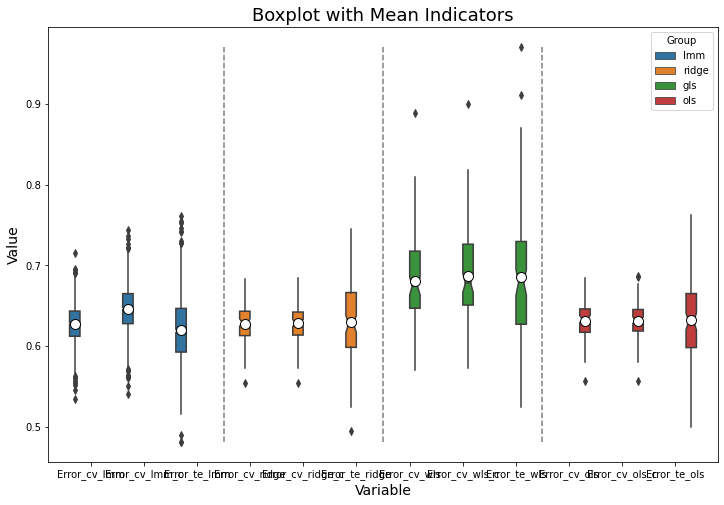

In [113]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x='variable', y='value', data=melted_df, showmeans=True, 
            notch=True, showcaps=False,
            hue="Group",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax)
plt.ylabel('Value', size=14)
plt.xlabel('Variable', size=14)
plt.title('Boxplot with Mean Indicators', size=18)
for i in range(3):
    plt.vlines((i+1)*3-0.5, np.min(melted_df['value']), np.max(melted_df['value']), colors='gray', linestyles='dashed')

plt.show()

In [122]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


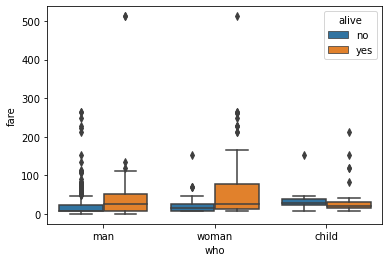

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic=sns.load_dataset("titanic")
titanic.head()
sns.boxplot(x="who", y="fare", hue="alive",data=titanic)
plt.show()

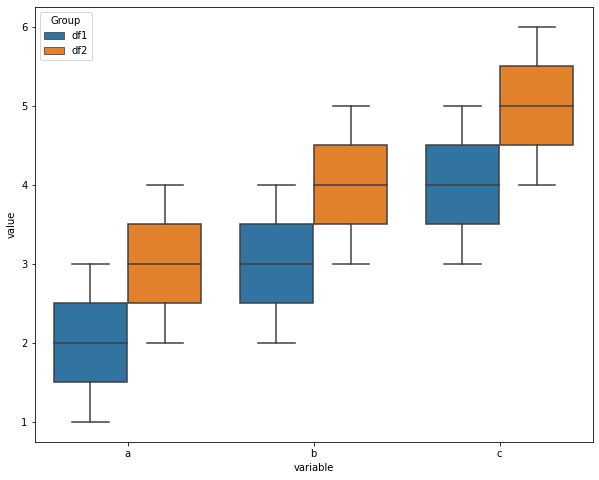

In [118]:

# Suppose df1 and df2 are your dataframes
df1 = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2, 3, 4],
    'c': [3, 4, 5]
})

df2 = pd.DataFrame({
    'a': [2, 3, 4],
    'b': [3, 4, 5],
    'c': [4, 5, 6]
})

# Add a column to indicate the source dataframe
df1['Group'] = 'df1'
df2['Group'] = 'df2'

# Combine dataframes
df = pd.concat([df1, df2])

# Melt the dataframe
melted_df = df.melt(id_vars='Group')

plt.figure(figsize=(10, 8))

# Use the new Hue column for coloring
sns.boxplot(x="variable", y="value", hue="Group", data=melted_df)

plt.show()

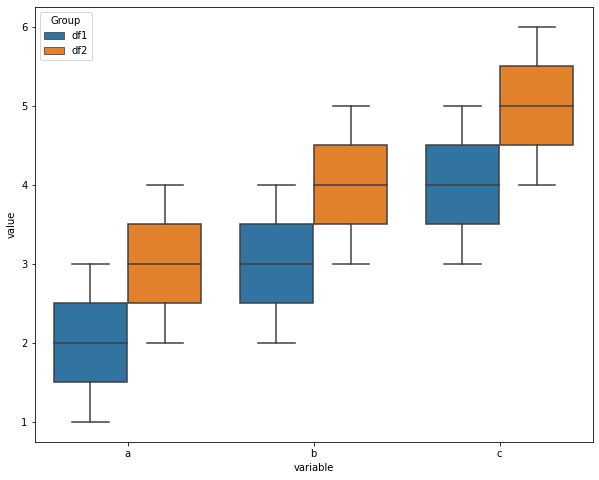

In [120]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df1 and df2 are your dataframes
df1 = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2, 3, 4],
    'c': [3, 4, 5]
})

df2 = pd.DataFrame({
    'a': [2, 3, 4],
    'b': [3, 4, 5],
    'c': [4, 5, 6]
})

# Add a column to indicate the source dataframe
df1['Group'] = 'df1'
df2['Group'] = 'df2'

# Combine dataframes
df = pd.concat([df1, df2])

# Melt the dataframe
melted_df = df.melt(id_vars='Group')

# Create a new column that combines the Group and variable columns
melted_df['Hue'] = melted_df['Group'] + "_" + melted_df['variable']

plt.figure(figsize=(10, 8))

# Use the new Hue column for coloring
sns.boxplot(x="variable", y="value", hue="Group", data=melted_df)

plt.show()


<AxesSubplot:xlabel='variable', ylabel='value'>

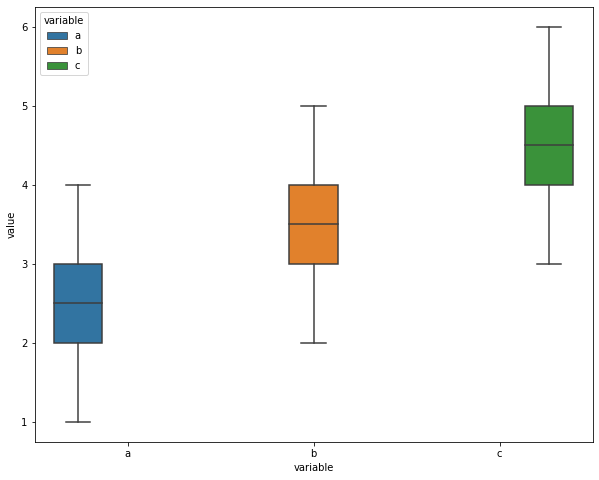

In [117]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="variable", y="value", hue="variable", data=melted_df)

In [110]:
df_melted

,variable,value
0,Error_cv_lmm,0.645153
1,Error_cv_lmm,0.617362
2,Error_cv_lmm,0.654335
3,Error_cv_lmm,0.643688
4,Error_cv_lmm,0.644600
...,...,...
5995,Error_te_lmm,0.569353
5996,Error_te_lmm,0.609963
5997,Error_te_lmm,0.620410
5998,Error_te_lmm,0.649954
